# <center> Домашнее задание 4 </center>

## 1. Матрица Тёплица (30 баллов)

1. Напишите функцию, которая на вход принимает вектор уникальных значений {$a_{n-1},  \dots, a_{0}, \dots, a_{-(n+1)}$} и размер матрицы, а выдает сгенерированную на основании этих значений [матрицу Тёплица](https://en.wikipedia.org/wiki/Toeplitz_matrix). В решении нельзя использовать готовые реализации из ```scipy.linalg``` или других библиотек, но необходимо использовать ```numpy```. 
2. Напишите функцию, которая принимает на вход матрицу размера $N \times N$ и проверяет, является ли она матрицей Тёплица. Функция должна вернуть в ответе булевое значение (```True``` или ```False```). 

In [89]:
# Your code here
#1
import numpy as np
def matrix_T(x):
    a_0=x[(len(x)+1)//2-1]
    zero=np.zeros(((len(x)+1)//2,(len(x)+1)//2))
    m=[]
    for i in range((len(x)+1)//2):
        m.append(a_0)
    M=np.diag(m)
    pravo=x[((len(x)+1)//2-1)::]
    levo=x[0:((len(x)+1)//2-1)+1]
    A=np.zeros((len(pravo),len(levo)))
    for k in range(1,len(pravo)):
        matrp=[pravo[k]]*((len(x)+1)//2-k)
        A+=np.diag(matrp,k)
    B=np.zeros((len(pravo),len(levo)))
    levo=levo[::-1]
    for j in range(1,len(levo)):
        matrl=[levo[j]]*((len(x)+1)//2-j)
        B+=np.diag(matrl,-j)
    return A+B+M
    
    
    

In [90]:
#2
def is_it_Toeplitz(x):
    razmer=x.shape[0]
    bag=[]
    for i in range(1,razmer):
        if len(set(np.diagonal(x,i)))==1:
            bag.append(0)
        else:
            bag.append(1)
    for j in range(razmer):
        if len(set(np.diagonal(x,-j)))==1:
            bag.append(0)
        else:
            bag.append(1)
    if sum(bag)==0:
        return True
    else:
        return False
        

## 2. Ищем лучшую однушку на ЦИАНе (35 баллов)

В этом задании будем скачивать объявления о продаже однокомнатных квартир в Москве c [ЦИАНа](https://www.cian.ru/cat.php?deal_type=sale&engine_version=2&offer_type=flat&p=1&region=1&room1=1) и выберем самую понравившуюся из них! :3

1. Напишите функцию, которая парсит все объявления с одной страницы и по каждому из них сохраняет ссылку (href) на объявление с более подробной информацией. Примените эту функцию для первых 10 страниц, сохранив все href в одном списке. Если хотите собрать полную информацию и не боитесь быть забаненными, можете скачать все 54 страницы.

2. Напишите функцию, которая для каждой (href) страницы с объявлением квартиры качает и сохраняет: 
* **Общую стоимость**
* **Адрес**
* **Ближайшее метро**
* **Тип жилья**
* **Площадь комнат**
* **Этаж**
* **Срок сдачи**

Сохраните эту информацию в DataFrame.

3. Избавьтесь от лишних символов в колонках с ценой квартиры, этажом и площадью комнат, приведя их к числову типу. Определите пороги по этим переменным, ниже или выше которых вы будете считать это жилье неподходящим. Например, цена не более 15 миллионов, этаж не ниже 2, общая площадь не менее 40 $м^2$. Можете выбрать другие наиболее важные для вас критерии, всего их должно быть не меньше 3. 
Отфильтруйте DataFrame, оставив только те объявления, которые удовлетворяют условиям. Отсортируйте оставшиеся объявления по возрастанию цены и отобразить топ-10 финальных кандидатов. Понравилась какая-нибудь квартира из них? :) 

In [153]:
import time
import pandas as pd
from tqdm import tqdm
import requests
from bs4 import BeautifulSoup
from fake_useragent import UserAgent
UserAgent().Firefox

'Mozilla/5.0 (X11;  Ubuntu; Linux i686; rv:52.0) Gecko/20100101 Firefox/52.0'

In [154]:
def parsim_cian(p):
        hrefs=[]
        UserAgent().Firefox
        url='https://www.cian.ru/cat.php?deal_type=sale&engine_version=2&offer_type=flat&p={}&region=1&room1=1'.format(p)
        response = requests.get(url, headers={'User-Agent': UserAgent().Firefox})
        tree=BeautifulSoup(response.content, 'html.parser')
        page_micro=tree.find_all('div',{'data-name':'LinkArea'})
        for i in range(len(page_micro)):
            hrefs.append(page_micro[i].a.get('href'))
        return hrefs

In [155]:
# Your code here
def itog_parsinga_10stranic():
    summa_hrefov=[]
    def parsim_cian(p):
        hrefs=[]
        import requests
        from bs4 import BeautifulSoup
        from fake_useragent import UserAgent
        UserAgent().chrome
        url='https://www.cian.ru/cat.php?deal_type=sale&engine_version=2&offer_type=flat&p={}&region=1&room1=1'.format(p)
        response = requests.get(url, headers={'User-Agent': UserAgent().chrome})
        tree=BeautifulSoup(response.content, 'html.parser')
        page_micro=tree.find_all('div',{'data-name':'LinkArea'})
        for i in range(len(page_micro)):
            hrefs.append(page_micro[i].a.get('href'))
        return hrefs
    for p in range(1,11):
        summa_hrefov.extend(parsim_cian(p))
    return summa_hrefov
    
    
    

In [152]:
blin=itog_parsinga_10stranic()

KeyboardInterrupt: 

In [ ]:
data2={}
data1_plus={}
data1_plus['Ссылка']=[]
data1_plus['Общая стоимость']=[]
data1_plus['Адрес']=[]
data1_plus['Ближайшее метро']=[]
data1_plus['Тип жилья']=[]
data2['Общая']=[]
data2['Кухня']=[]
data2['Жилая']=[]
data2['Этаж']=[]
data2['Срок сдачи']=[]
data2['Построен']=[]
for i in range(len(blin)):
    url1=blin[i]
    res=requests.get(url1, headers={'User-Agent': UserAgent().chrome})
    tree1=BeautifulSoup(res.content, 'html.parser')
    price=tree1.find('span',{'itemprop':'price'}).get('content')
    adress=tree1.find('address',{'class':'a10a3f92e9--address--140Ec'}).find_all('a',{'data-name':'Link'})
    address=[]
    a=[]
    for j in range(len(adress)):
        address.extend(adress[j])
    address=' '.join(address)
    metro=tree1.find('ul',{'class':'a10a3f92e9--undergrounds--2pop3'}).text.replace('⋅','-')
    type_of_house=tree1.find('h1',{'class':'a10a3f92e9--title--2Widg'}).text.replace('1-комн. ','')
    type_of_house=type_of_house[0:type_of_house.find(",")]
    plochad=tree1.find_all('div',{'class':'a10a3f92e9--info--3XiXi'})
    for k in range (len(plochad)):
        a.append(plochad[k].find('div',{'class':'a10a3f92e9--info-title--2bXM9'}).text)
    for el in list(data2.keys()):
        if el not in a:
            data2[el].append(np.nan)
    for s in range(len(a)):
        data2[plochad[s].find('div',{'class':'a10a3f92e9--info-title--2bXM9'}).text].append(plochad[s].find('div',{'class':'a10a3f92e9--info-value--18c8R'}).text)
    data1_plus['Ссылка'].append(url1)
    data1_plus['Общая стоимость'].append(price)
    data1_plus['Адрес'].append(address)
    data1_plus['Ближайшее метро'].append(metro)
    data1_plus['Тип жилья'].append(type_of_house)
    time.sleep(10)
data2['Ссылка']=data1_plus['Ссылка']
data2['Общая стоимость']=data1_plus['Общая стоимость']
data2['Адрес']=data1_plus['Адрес']
data2['Ближайшее метро']=data1_plus['Ближайшее метро']
data2['Тип жилья']=data1_plus['Тип жилья']

In [ ]:
def delaem_tablichku():
    global blin
    data={}
    data_plus={}
    data_plus['Ссылка']=[]
    data_plus['Общая стоимость']=[]
    data_plus['Адрес']=[]
    data_plus['Ближайшее метро']=[]
    data_plus['Тип жилья']=[]
    data['Общая']=[]
    data['Кухня']=[]
    data['Жилая']=[]
    data['Этаж']=[]
    data['Срок сдачи']=[]
    data['Построен']=[]
    for i in range(len(blin)):
        url1=blin[i]
        res=requests.get(url1, headers={'User-Agent': UserAgent().chrome})
        tree1=BeautifulSoup(res.content, 'html.parser')
        try:
            price=tree1.find('span',{'itemprop':'price'}).get('content')
        except AttributeError:
            price=np.nan
        adress=tree1.find('address',{'class':'a10a3f92e9--address--140Ec'}).find_all('a',{'data-name':'Link'})
        address=[]
        a=[]
        for j in range(len(adress)):
            address.extend(adress[j])
        address=' '.join(address)
        metro=tree1.find('ul',{'class':'a10a3f92e9--undergrounds--2pop3'}).text.replace('⋅','-')
        type_of_house=tree1.find('h1',{'class':'a10a3f92e9--title--2Widg'}).text.replace('1-комн. ','')
        type_of_house=type_of_house[0:type_of_house.find(",")]
        plochad=tree1.find_all('div',{'class':'a10a3f92e9--info--3XiXi'})
        for k in range (len(plochad)):
            a.append(plochad[k].find('div',{'class':'a10a3f92e9--info-title--2bXM9'}).text)
        for el in list(data.keys()):
            if el not in a:
                data[el].append(np.nan)
        for s in range(len(a)):
            data[plochad[s].find('div',{'class':'a10a3f92e9--info-title--2bXM9'}).text].append(plochad[s].find('div',{'class':'a10a3f92e9--info-value--18c8R'}).text)
        data_plus['Ссылка'].append(url1)
        data_plus['Общая стоимость'].append(price)
        data_plus['Адрес'].append(address)
        data_plus['Ближайшее метро'].append(metro)
        data_plus['Тип жилья'].append(type_of_house)
    data['Ссылка']=data_plus['Ссылка']
    data['Общая стоимость']=data_plus['Общая стоимость']
    data['Адрес']=data_plus['Адрес']
    data['Ближайшее метро']=data_plus['Ближайшее метро']
    data['Тип жилья']=data_plus['Тип жилья']
    return pd.DataFrame(data)

In [156]:
dff=delaem_tablichku()

NameError: name 'delaem_tablichku' is not defined

In [175]:
#список полученный в результате парсинга 1 ой страницы по подобному коду с незначительными изменениями:
#data2={}
#data1_plus={}
#data1_plus['Ссылка']=[]
#data1_plus['Общая стоимость']=[]
#data1_plus['Адрес']=[]
#data1_plus['Ближайшее метро']=[]
#data1_plus['Тип жилья']=[]
#data2['Общая']=[]
#data2['Кухня']=[]
#data2['Жилая']=[]
#data2['Этаж']=[]
#data2['Срок сдачи']=[]
#data2['Построен']=[]
#url1=parsim_cian(1)
#res=requests.get(url1, headers={'User-Agent': UserAgent().chrome})
#tree1=BeautifulSoup(res.content, 'html.parser')
#price=tree1.find('span',{'itemprop':'price'}).get('content')
#adress=tree1.find('address',{'class':'a10a3f92e9--address--140Ec'}).find_all('a',{'data-name':'Link'})
#address=[]
#a=[]
#for j in range(len(adress)):
#    address.extend(adress[j])
#address=' '.join(address)
#metro=tree1.find('ul',{'class':'a10a3f92e9--undergrounds--2pop3'}).text.replace('⋅','-')
#type_of_house=tree1.find('h1',{'class':'a10a3f92e9--title--2Widg'}).text.replace('1-комн. ','')
#type_of_house=type_of_house[0:type_of_house.find(",")]
#plochad=tree1.find_all('div',{'class':'a10a3f92e9--info--3XiXi'})
#for k in range (len(plochad)):
#    a.append(plochad[k].find('div',{'class':'a10a3f92e9--info-title--2bXM9'}).text)
#for el in list(data2.keys()):
#    if el not in a:
#        data2[el].append(np.nan)
#for s in range(len(a)):
#    data2[plochad[s].find('div',{'class':'a10a3f92e9--info-title--2bXM9'}).text].append(plochad[s].find('div',{'class':'a10a3f92e9--info-value--18c8R'}).text)
#data1_plus['Ссылка'].append(url1)
#data1_plus['Общая стоимость'].append(price)
#data1_plus['Адрес'].append(address)
#data1_plus['Ближайшее метро'].append(metro)
#data1_plus['Тип жилья'].append(type_of_house)
#time.sleep(10)
#data2['Ссылка']=data1_plus['Ссылка']
#data2['Общая стоимость']=data1_plus['Общая стоимость']
#data2['Адрес']=data1_plus['Адрес']
#data2['Ближайшее метро']=data1_plus['Ближайшее метро']
#data2['Тип жилья']=data1_plus['Тип жилья']
nan=np.nan
data_2={'Общая': ['75,6\xa0м²',
  '65,1\xa0м²',
  '35,2\xa0м²',
  '101,8\xa0м²',
  '50,1\xa0м²',
  '38,2\xa0м²',
  '35,6\xa0м²',
  '92,3\xa0м²',
  '41,4\xa0м²',
  '45,75\xa0м²',
  '41\xa0м²',
  '42,9\xa0м²',
  '66,1\xa0м²',
  '43,4\xa0м²',
  '38,1\xa0м²',
  '38,89\xa0м²',
  '28,5\xa0м²',
  '59,17\xa0м²',
  '49,1\xa0м²',
  '48,3\xa0м²',
  '66,2\xa0м²',
  '42\xa0м²',
  '55,6\xa0м²',
  '43,5\xa0м²',
  '43,7\xa0м²',
  '40,6\xa0м²',
  '35,7\xa0м²',
  '41,9\xa0м²'],
 'Кухня': [nan,
  nan,
  nan,
  nan,
  '21,8\xa0м²',
  '10\xa0м²',
  '10,2\xa0м²',
  nan,
  '14,5\xa0м²',
  '20,1\xa0м²',
  nan,
  '21,2\xa0м²',
  '22,3\xa0м²',
  nan,
  nan,
  '10,6\xa0м²',
  '12,9\xa0м²',
  nan,
  '17,5\xa0м²',
  '23,6\xa0м²',
  '37,2\xa0м²',
  '20,2\xa0м²',
  nan,
  nan,
  '18,6\xa0м²',
  '17,2\xa0м²',
  '17\xa0м²',
  '7,3\xa0м²'],
 'Жилая': [nan,
  nan,
  nan,
  nan,
  '14,8\xa0м²',
  '19,9\xa0м²',
  '18,3\xa0м²',
  '13,3\xa0м²',
  '16\xa0м²',
  '12,5\xa0м²',
  nan,
  '12,2\xa0м²',
  nan,
  nan,
  nan,
  '19,9\xa0м²',
  '8,6\xa0м²',
  nan,
  '14,5\xa0м²',
  '13,5\xa0м²',
  '16,6\xa0м²',
  '13,6\xa0м²',
  nan,
  nan,
  '12,7\xa0м²',
  '14,9\xa0м²',
  '10,1\xa0м²',
  '17,4\xa0м²'],
 'Этаж': ['6 из 8',
  '2 из 5',
  '15 из 33',
  '5 из 5',
  '22 из 25',
  '14 из 22',
  '8 из 17',
  '3 из 5',
  '2 из 12',
  '6 из 19',
  '23 из 28',
  '15 из 33',
  '4 из 11',
  '8 из 24',
  '17 из 24',
  '11 из 11',
  '20 из 30',
  '29 из 39',
  '14 из 22',
  '8 из 13',
  '4 из 12',
  '12 из 33',
  '12 из 15',
  '7 из 10',
  '22 из 30',
  '16 из 19',
  '16 из 16',
  '10 из 16'],
 'Срок сдачи': ['1 кв. 2014',
  '4 кв. 2018',
  '4 кв. 2023',
  nan,
  '1 кв. 2022',
  nan,
  nan,
  '3 кв. 2019',
  '3 кв. 2021',
  '4 кв. 2021',
  '2 кв. 2021',
  '1 кв. 2023',
  nan,
  nan,
  nan,
  '4 кв. 2021',
  '3 кв. 2021',
  '1 кв. 2021',
  '3 кв. 2021',
  '4 кв. 2021',
  '4 кв. 2020',
  '4 кв. 2022',
  nan,
  '2 кв. 2022',
  '4 кв. 2022',
  '4 кв. 2022',
  '2 кв. 2022',
  '2 кв. 2021'],
 'Построен': [nan,
  nan,
  nan,
  '2009',
  nan,
  '2007',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 'Ссылка': ['https://www.cian.ru/sale/flat/246614632/',
  'https://www.cian.ru/sale/flat/246614666/',
  'https://www.cian.ru/sale/flat/244750187/',
  'https://www.cian.ru/sale/flat/244703533/',
  'https://www.cian.ru/sale/flat/246637828/',
  'https://www.cian.ru/sale/flat/242213434/',
  'https://www.cian.ru/sale/flat/243306819/',
  'https://www.cian.ru/sale/flat/245980827/',
  'https://www.cian.ru/sale/flat/238073308/',
  'https://www.cian.ru/sale/flat/244325026/',
  'https://www.cian.ru/sale/flat/245694284/',
  'https://www.cian.ru/sale/flat/245652090/',
  'https://www.cian.ru/sale/flat/220614116/',
  'https://www.cian.ru/sale/flat/245966788/',
  'https://www.cian.ru/sale/flat/245966501/',
  'https://www.cian.ru/sale/flat/232199279/',
  'https://www.cian.ru/sale/flat/239821227/',
  'https://www.cian.ru/sale/flat/241020123/',
  'https://www.cian.ru/sale/flat/227079612/',
  'https://www.cian.ru/sale/flat/233566586/',
  'https://www.cian.ru/sale/flat/240748079/',
  'https://www.cian.ru/sale/flat/245263487/',
  'https://www.cian.ru/sale/flat/235896822/',
  'https://www.cian.ru/sale/flat/242203837/',
  'https://www.cian.ru/sale/flat/235119034/',
  'https://www.cian.ru/sale/flat/245174968/',
  'https://www.cian.ru/sale/flat/234218048/',
  'https://www.cian.ru/sale/flat/244508951/'],
 'Общая стоимость': ['65 167 200 ₽',
  '55 335 000 ₽',
  '12 890 734 ₽',
  '61 080 000 ₽',
  '13 315 330 ₽',
  '8 300 000 ₽',
  '7 060 628 ₽',
  '24 108 760 ₽',
  '9 671 702 ₽',
  '12 551 630 ₽',
  '14 555 000 ₽',
  '11 291 280 ₽',
  '39 000 000 ₽',
  '11 900 931 ₽',
  '11 113 008 ₽',
  '10 683 083 ₽',
  '8 535 750 ₽',
  '17 617 426 ₽',
  '11 405 930 ₽',
  '8 568 913 ₽',
  '22 740 957 ₽',
  '8 341 200 ₽',
  '40 000 000 ₽',
  '12 958 149 ₽',
  '8 569 570 ₽',
  '9 204 020 ₽',
  '7 154 280 ₽',
  '14 246 000 ₽'],
 'Адрес': ['Москва ЦАО р-н Арбат ул. Арбат 24',
  'Москва ЦАО р-н Арбат ул. Арбат 39',
  'Москва СЗАО р-н Хорошево-Мневники Причальный проезд 8',
  'Москва ЦАО р-н Мещанский пер. Печатников 19С1',
  'Москва СЗАО р-н Покровское-Стрешнево Волоколамское ш.',
  'Москва ЗАО р-н Можайский Сколковское ш. 30',
  'Москва ЮВАО р-н Некрасовка ул. Вертолетчиков 4',
  'Москва СВАО р-н Марьина роща проезд 12-й Марьиной рощи 8',
  'Москва СВАО р-н Ярославский ул. Красная Сосна',
  'Москва СВАО р-н Алексеевский Новоалексеевская ул. 16С1',
  'Москва СЗАО р-н Хорошево-Мневники бул. Генерала Карбышева',
  'Москва ЗАО р-н Кунцево ул. Академика Павлова 38',
  'Москва ЦАО р-н Хамовники ул. Ефремова 10с1к4/5',
  'Москва ЮАО р-н Даниловский Автозаводская ул. 23Бк2',
  'Москва ЮАО р-н Даниловский Автозаводская ул. 23Бк2',
  'Москва СВАО р-н Останкинский Сельскохозяйственная ул. 35к6',
  'Москва ЮВАО р-н Рязанский Рязанский просп. с26к2',
  'Москва ЗАО р-н Раменки ул. Лобачевского 120',
  'Москва СВАО р-н Лосиноостровский Янтарный проезд',
  'Москва НАО (Новомосковский) Десеновское поселение Ватутинки поселок Рашен Дизайн Дистрикт жилой комплекс к4А',
  'Москва ЦАО р-н Басманный Бакунинская ул. 5',
  'Москва СВАО р-н Южное Медведково Полярная 25 жилой комплекс к6',
  'Москва ЦАО р-н Хамовники ул. Усачева 11к5.1',
  'Москва ЮАО р-н Даниловский Автозаводская ул.',
  'Москва ЮВАО р-н Рязанский 2-я Институтская ул. 6к6',
  'Москва САО р-н Тимирязевский 3-й Нижнелихоборский проезд 1к2',
  'Москва ЮВАО р-н Люблино Люблинская ул. 72к7',
  'Москва ЮВАО р-н Южнопортовый ул. 1-я Машиностроения 7А'],
 'Ближайшее метро': ['Арбатская -  9 мин. пешкомСмоленская -  9 мин. пешкомКропоткинская -  12 мин. пешком',
  'Смоленская -  6 мин. пешкомАрбатская -  12 мин. пешкомКропоткинская -  13 мин. пешком',
  'Шелепиха -  6 мин. пешкомТестовская -  20 мин. пешкомФили -  4 мин. на транспорте',
  'Трубная -  6 мин. пешкомСретенский бульвар -  7 мин. пешкомТургеневская -  8 мин. пешком',
  'Тушинская -  19 мин. пешкомСпартак -  4 мин. на транспортеВолоколамская -  5 мин. на транспорте',
  'Сетунь -  5 мин. на транспортеНемчиновка -  5 мин. на транспортеРабочий поселок -  5 мин. на транспорте',
  'Некрасовка -  14 мин. пешкомЛухмановская -  5 мин. на транспорте',
  'Марьина роща -  13 мин. пешкомБутырская -  20 мин. пешкомУлица Академика Королева -  4 мин. на транспорте',
  'Выставочный центр -  6 мин. на транспортеВДНХ -  7 мин. на транспортеУлица Академика Королева -  7 мин. на транспорте',
  'Алексеевская -  9 мин. пешкомВДНХ -  4 мин. на транспортеРжевская откроется в 2022 -  4 мин. на транспорте',
  'Октябрьское поле -  5 мин. на транспортеЗорге -  7 мин. на транспортеПанфиловская -  9 мин. на транспорте',
  'Молодежная -  10 мин. пешкомКрылатское -  16 мин. пешкомМневники откроется в 2021 -  5 мин. на транспорте',
  'Фрунзенская -  9 мин. пешкомСпортивная -  8 мин. пешкомЛужники -  12 мин. пешком',
  'ЗИЛ -  4 мин. пешкомТехнопарк -  5 мин. на транспортеАвтозаводская -  12 мин. пешком',
  'ЗИЛ -  4 мин. пешкомТехнопарк -  5 мин. на транспортеАвтозаводская -  12 мин. пешком',
  'Ботанический сад -  2 мин. на транспортеСвиблово -  5 мин. на транспортеОтрадное -  3 мин. на транспорте',
  'Окская -  5 мин. пешкомРязанский проспект -  15 мин. пешкомКузьминки -  4 мин. на транспорте',
  'Аминьевское шоссе откроется в 2021 -  8 мин. пешкомМичуринский проспект -  4 мин. на транспортеРаменки -  5 мин. на транспорте',
  'Бабушкинская -  20 мин. пешкомМедведково -  6 мин. на транспортеСвиблово -  6 мин. на транспорте',
  'Ольховая -  17 мин. на транспортеПрокшино -  17 мин. на транспортеФилатов Луг -  18 мин. на транспорте',
  'Бауманская -  2 мин. пешкомКрасносельская -  17 мин. пешкомЭлектрозаводская -  2 мин. на транспорте',
  'Медведково -  4 мин. на транспортеБабушкинская -  5 мин. на транспортеСвиблово -  5 мин. на транспорте',
  'Фрунзенская -  3 мин. пешкомПарк Культуры -  5 мин. на транспортеСпортивная -  8 мин. пешком',
  'Технопарк -  12 мин. пешкомЗИЛ -  5 мин. на транспортеКоломенская -  4 мин. на транспорте',
  'Окская -  11 мин. пешкомРязанский проспект -  17 мин. пешкомСтахановская -  4 мин. на транспорте',
  'Окружная -  13 мин. пешкомВерхние Лихоборы -  13 мин. пешкомЛихоборы -  18 мин. пешком',
  'Перерва -  4 мин. на транспортеБратиславская -  4 мин. на транспортеМарьино -  4 мин. на транспорте',
  'Дубровка -  3 мин. пешкомКожуховская -  17 мин. пешкомАвтозаводская -  19 мин. пешком'],
 'Тип жилья': ['квартира',
  'квартира',
  'квартира',
  'квартира',
  'апартаменты',
  'квартира',
  'квартира',
  'апартаменты',
  'квартира',
  'апартаменты',
  'квартира',
  'квартира',
  'квартира',
  'квартира',
  'квартира',
  'квартира',
  'квартира',
  'квартира',
  'квартира',
  'квартира',
  'апартаменты',
  'квартира',
  'квартира',
  'квартира',
  'квартира',
  'квартира',
  'квартира',
  'квартира']}

In [176]:
dff=pd.DataFrame(data_2)

In [177]:
drdrd=[]
for aaa in range(len(dff['Общая'])):
    nnn=float(dff['Общая'][aaa].replace('\xa0м²','').replace(',','.'))
    drdrd.append(nnn)
dff['Общая']=drdrd

In [178]:
ahah=[]
for neet in range(len(dff['Общая стоимость'])):
    ggg=int(dff['Общая стоимость'][neet].replace(' ','').replace('₽',''))
    ahah.append(ggg)
dff['Общая стоимость']=ahah

In [179]:
pamagi=[]
for hvatit in range(len(dff['Этаж'])):
    pamagi.append(int(dff['Этаж'][hvatit][0:dff['Этаж'][hvatit].find(' ')]))
dff['Этаж']=pamagi

In [180]:
ura=dff[dff['Общая стоимость']<70000000]
ura=ura.query('Общая > 60')
ura=ura.query('Этаж > 2')

In [181]:
URA=ura.sort_values('Общая стоимость').head(10)


## 3. Дефолты (35 баллов)

Судя по стоимости недвижимости в Москве, придется влезть в долги... Проанализируем, как часто люди не отдают ипотеки и кредиты! 

В файле ```defaults.csv``` предоставлены данные, которые можно использовать для анализа клиентской базы, предсказания дефолта, кредитного скоринга (т.е. для оценки кредитных рисков клиентов). 

Переменные:
* **ID** - идентификатор клиента;
* **LIMIT_BAL** - сумма предоставленного кредита/ипотеки (в долларах);
* **SEX** - пол (1=мужской, 2=женский);
* **EDUCATION** - уровень образования (1=научная степень, 2=высшее, 3=среднее, 4=другое, 5 и 6=неизвестно);
* **MARRIAGE** - семейное положение (1=женат/замужем, 2=холост/незамужняя, 3=другое);
* **AGE** - возраст (в годах);
* **PAY_0** - Статус погашения кредита в сентябре (-1 = надлежащая оплата, 1 = задержка платежа на один месяц, 2 = задержка платежа на два месяца, ... 8 = задержка платежа на восемь месяцев, 9 = задержка платежа на девять месяцев и более). **PAY_2, PAY_3, ..., PAY_6** - в августе, июле, июне, мае и апреле соответственно;
* **BILL_AMT1** - Сумма выписки по счету в сентябре (в долларах). **BILL_AMT2, BILL_AMT3, ..., BILL_AMT6** - в августе, июле, июне, мае и апреле соответственно;
* **PAY_AMT1** - Сумма предыдущего платежа в сентябре (в долларах). **PAY_AMT1, PAY_AMT2, ..., PAY_AMT6** - в августе, июле, июне, мае и апреле соответственно;
* **default.payment.next.month**: произошел дефолт (1=да, 0=нет).

Нужно проанализировать набор данных банка, выполнив следующие задания:
1. Загрузить данные и преобразуйте в pd.DataFrame. Какого размера этот датасет? Посмотрите на первые 10 строк ваших данных. С помощью ```random.randint()``` в диапазоне значений индексов строк сгенерируйте случайное число $N$ и верните строки из датафрейма по индексам от $N$ до $N + 20$.<br>
2. Отобразите количество пропущенных значений во всех колонках.  <br>
3. Выведите количество уникальных клиентов в датасете, покажите не менее 2 разных способов это сделать. <br>
4. Проверьте, есть ли среди клиентов дисбаланс в количестве женщин и мужчин? Какого их соотношение (в процентах)? <br>
5. Создайте новую переменную **AGE_BINS** с категориями по переменной возраст (= возрастными диапазонами). Постройте и сравните графики распределения клиентов по значениям переменных *AGE* и *AGE_BINS*. Клиенты каких возрастов чаще всего приходят за кредитом в этот банк? Есть ли преимущество использования переменной c категориям? <br>
6. Выведите общее количество клиентов с дефолтом и без него. Постройте гистограмму с процентным отношением этих групп. Как можно оценить, велика ли полученная доля клиентов с дефолтом? <br>
7. Постройте гистограмму и график плотности распределения по суммам предоставленных кредитов (*LIMIT_BAL*) для каждой из групп клиентов отдельно (с дефолтом и без), поместив их на один график. Сделайте размер графика побольше, поменяйте дефолтные цвета. 
8. На основе графика из предыдущего пункта, ответьте на вопросы:
* По кредитам какого размера чаще всего происходят дефолты?
* На основе графиков плотности распределения, начиная от какой суммы кредита клиентов без дефолта становится больше, чем клиентов с дефолтом? 
* Как по графику определить, есть ли такие одобренные суммы кредитов, по которым никогда не происходит дефолт? Выведите значения а) сумм кредитов, по которым всегда встречается дефолт, б) и те, по которым никогда не бывает дефолта. <br>
9. Постройте матрицу корреляций для всех переменных по статусу погашения кредита. Добавьте значения корреляций на график. Есть ли общий тренд по возрастанию/убыванию корреляции по времени (всем месяцам)? <br>
10. Напишите функцию, которая возвращает словарь, где ключ - это сумма одобренного кредита, а значение - это вложенный словарь. В нем по ключу ```ratio``` хранится отношение клиентов с дефолтом к тем, у кого его не было, с такой суммой кредитов, а по ключу ```num_clients```  - общее число клиентов с таким кредитом. Пример элемента словаря: ``` {50000.0 : {'ratio': 0.357, 'num_clients': 3365}```. Отсортируйте получившийся словарь по ключу ```ratio``` в убывающем порядке. У какого размера кредита наибольшая доля клиентов с дефолтом? А сколько в датасете клиентов, по которым посчитана эта доля? Можем ли мы сделать вывод, что в целом не стоит одобрять эту сумму для кредита новым клиентам? <br>

Важно! Каждый график должен содержать как минимум заголовок и подписанные оси. 

In [102]:
# Your code here
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly_express as px
import numpy as np
import pandas as pd
from random import randint
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
df=pd.read_csv('defaults.csv')
df=pd.DataFrame(df)
print(df.head(10))
N=randint(0,len(df))
df[N:N+20]


   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   
5   6    50000.0    1          1         2   37      0      0      0      0   
6   7   500000.0    1          1         2   29      0      0      0      0   
7   8   100000.0    2          2         2   23      0     -1     -1      0   
8   9   140000.0    2          3         1   28      0      0      2      0   
9  10    20000.0    1          3         2   35     -2     -2     -2     -2   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
16333,16334,60000.0,2,2,1,36,0,0,0,0,...,41241.0,29534.0,29297.0,2000.0,3042.0,1433.0,1012.0,1029.0,1074.0,1
16334,16335,60000.0,2,2,1,36,0,0,0,0,...,22095.0,14293.0,12217.0,1805.0,5816.0,1000.0,5000.0,12217.0,8000.0,0
16335,16336,140000.0,2,1,2,37,1,-2,-2,-2,...,-18.0,-18.0,-18.0,0.0,0.0,0.0,0.0,0.0,0.0,0
16336,16337,60000.0,2,2,1,35,0,0,0,0,...,29164.0,27829.0,27574.0,3023.0,2245.0,2005.0,2000.0,1088.0,3000.0,0
16337,16338,500000.0,2,1,2,39,-1,-1,-2,-1,...,10362.0,21905.0,23717.0,0.0,0.0,10370.0,15000.0,10000.0,4311.0,1
16338,16339,420000.0,2,2,1,41,0,0,0,0,...,361024.0,354813.0,344221.0,33808.0,14996.0,13209.0,12890.0,11081.0,16298.0,1
16339,16340,30000.0,2,2,1,43,2,2,2,2,...,17272.0,18131.0,17711.0,0.0,3141.0,0.0,1434.0,0.0,1581.0,1
16340,16341,170000.0,2,3,1,38,0,0,0,-1,...,1264.0,948.0,632.0,1336.0,2000.0,1264.0,0.0,0.0,0.0,0
16341,16342,200000.0,2,1,1,49,-1,-1,-1,-1,...,1712.0,9549.0,1060.0,0.0,94.0,1712.0,9549.0,1060.0,0.0,0
16342,16343,160000.0,2,1,1,45,0,0,0,0,...,115923.0,107621.0,110006.0,3972.0,5800.0,4431.0,3854.0,4121.0,4603.0,0


In [103]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [104]:
df['ID'].nunique()

30000

In [105]:
len(set(df['ID']))

30000

In [106]:
sex=list(df['SEX'])
women=sex.count(2)
men=sex.count(1)
print('men:', men)
print('women:', women)
print('Кол-во женщин в процентах', women/len(df)*100,'%')
print('Кол-во мужчин в процентах,', men/len(df)*100, '%')

men: 11888
women: 18112
Кол-во женщин в процентах 60.373333333333335 %
Кол-во мужчин в процентах, 39.626666666666665 %


<AxesSubplot:title={'center':'Распределение кредиторов в зависимости от возрастной группы'}, xlabel='AGE_BINS', ylabel='Количество кредиторов'>

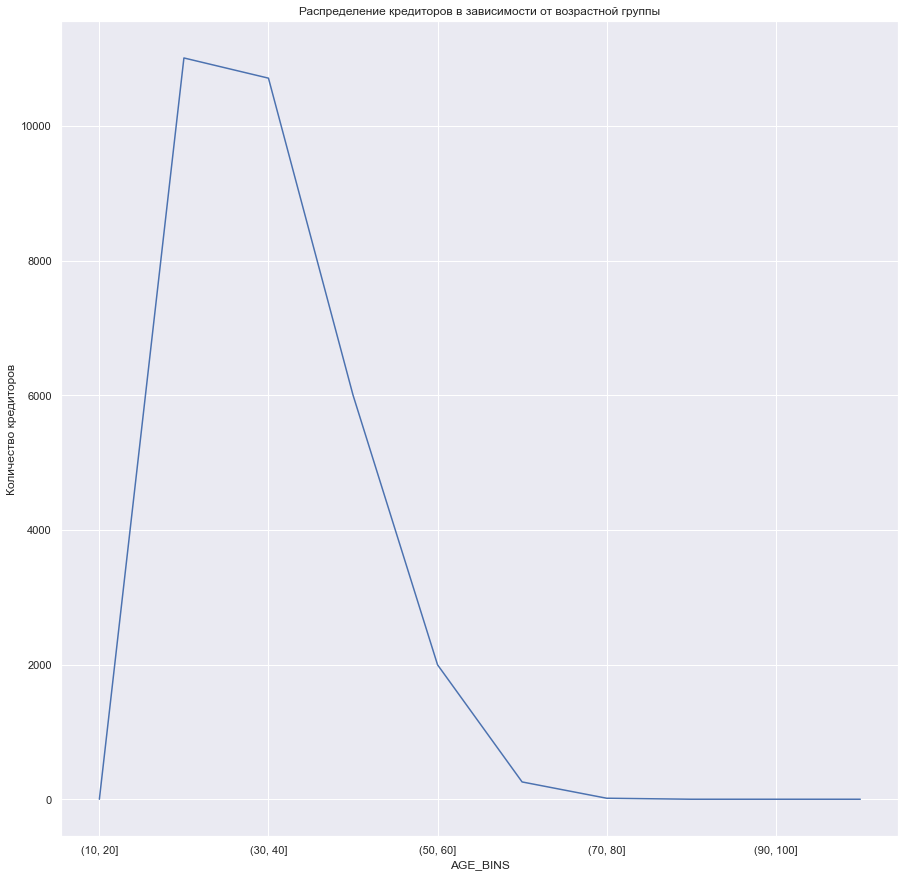

In [107]:
#AGE_BINS?
df['AGE_BINS'] = pd.cut(df['AGE'],[10,20, 30, 40, 50, 60, 70, 80, 90, 100, 1000])
df_3=df.groupby('AGE',as_index=False)['ID'].count().rename(columns={'ID':'Количество кредиторов','AGE':'Возраст'})
df_4=df.groupby('AGE_BINS')['ID'].count()
px.line(df_3, x='Возраст',y='Количество кредиторов',title='Распределение кредиторов в зависимости от возрастa').show()
ax=plt.subplots(figsize = (15,15))
df_4.plot(ylabel='Количество кредиторов',title='Распределение кредиторов в зависимости от возрастной группы')

In [108]:
defolts=df['default.payment.next.month'].value_counts()/df['default.payment.next.month'].count()*100

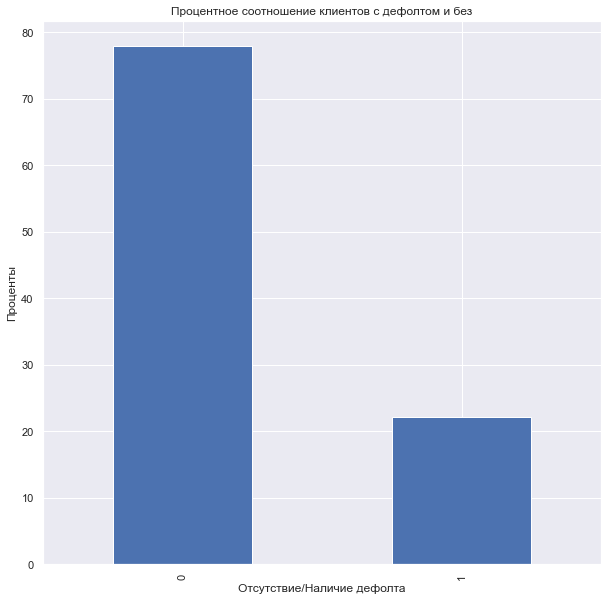

In [109]:
fig,ax=plt.subplots(figsize=(10,10))
defolts.plot(kind='bar', xlabel='Отсутствие/Наличие дефолта',ylabel='Проценты',title='Процентное соотношение клиентов с дефолтом и без')
plt.grid(True)

In [110]:
#Постройте гистограмму и график плотности распределения по суммам предоставленных кредитов (LIMIT_BAL) для каждой из групп клиентов отдельно (с дефолтом и без), поместив их на один график. Сделайте размер графика побольше, поменяйте дефолтные цвета.
#На основе графика из предыдущего пункта, ответьте на вопросы:
#По кредитам какого размера чаще всего происходят дефолты?
#На основе графиков плотности распределения, начиная от какой суммы клиентредита клиентов без дефолта становится больше, чем ков с дефолтом?
#Как по графику определить, есть ли такие одобренные суммы кредитов, по которым никогда не происходит дефолт? Выведите значения а) сумм кредитов, по которым всегда встречается дефолт, б) и те, по которым никогда не бывает дефолта.
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Density'>

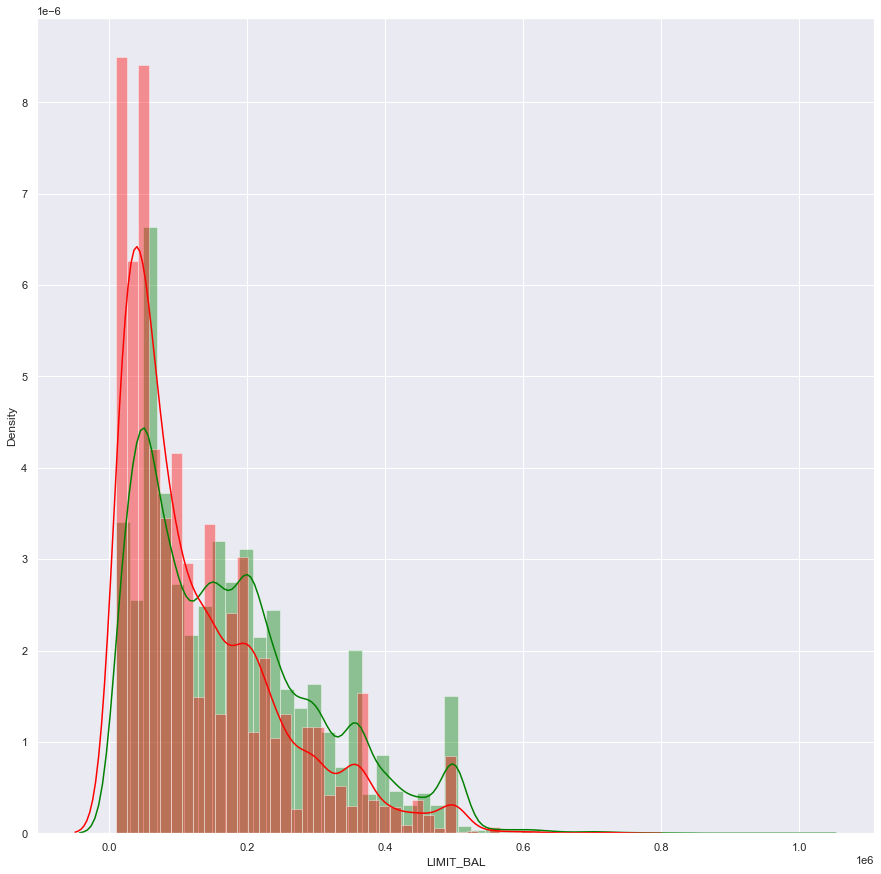

In [111]:
df_0=df[df['default.payment.next.month']==0]['LIMIT_BAL']
df_1=df[df['default.payment.next.month']==1]['LIMIT_BAL']
sns.set(rc={'figure.figsize':(15,15)})
sns.distplot(df_0, color='green')
sns.distplot(df_1, color='red')

In [ ]:
#№8 По кредитам в 50000 д.е. дефолты происходят чаще всего.
print(df[df['default.payment.next.month']==0]['LIMIT_BAL'].mode())
# После суммы в приблизительно 18000 количество клиентов без дефолтов всегда больше, чем с дефолтами.

# Суммы, по которым всегда встречается дефолт
print(df[df['default.payment.next.month']==1]['LIMIT_BAL'])
#Cуммы, по которым никогда не встречается дефолт
defoltiky=df[df['default.payment.next.month']==1]['LIMIT_BAL'].unique().tolist()
nedefoltiky=df[df['default.payment.next.month']==0]['LIMIT_BAL'].unique().tolist()
viborka=[]
for nedefoltik in nedefoltiky:
    if nedefoltik not in defoltiky:
        viborka.append(nedefoltik)
print(viborka) #-список сумм, по которым не было дефолтов.

<AxesSubplot:>

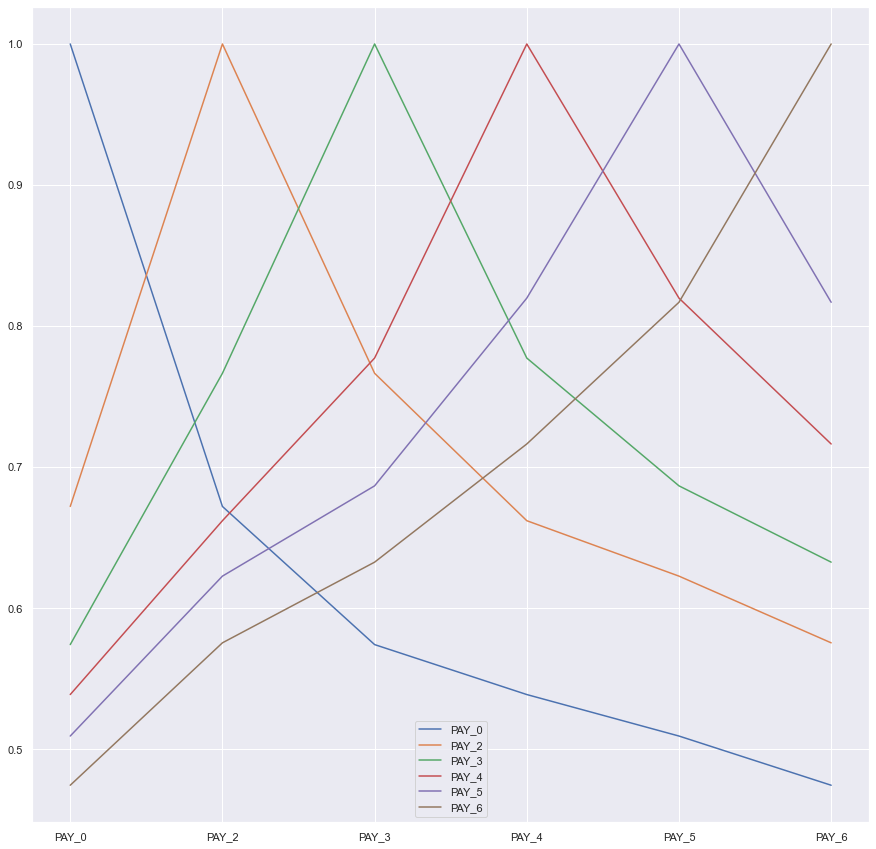

In [116]:
#9
df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].corr().plot()

## *4. Друзья друзей (бонусное, 30 баллов) 

In [203]:
#64c23634aaa7614547d4c7f82f4c827b096e1660d4616d787b1a1ebae73b17e87a49371016ae35cf8c0bd

1. С помощью VK API скачайте id всех ваших друзей. Убедитесь, что у вас открытый аккаунт, иначе будет ошибка доступа, и ничего скачать не удастся. Если вы не хотите открывать аккаунт, можете выбрать другой (например, аккаунт какой-то известной личности). 
2. Напишите функцию, которая с помощью ```users.get``` и ```friends.get``` по каждому человеку из списка друзей скачивает имя, фамилию, пол, город, дату рождения, образование, количество друзей. Напишите исключение, если у друга закрытый аккаунт, чтобы не включать его в анализ и функция не ломалась. 
3. Постройте график распределения количества друзей по всем друзьям. Создайте переменную ```friends_count_cat```, которая на основе количество друзей принимает значения $1$ - если друзей мало, $2$ - средне, $3$ - много друзей. Определите диапазоны для этих значений на основе графика с распределением. Постройте гистограмму по новой переменной. 
4. Разбейте колонку с образованием на две колонки ```university``` и ```faculty```, в первой сохранив название университета, во второй - название факультета. Удалите исходную колонку с образованием. Сгруппируйте данные по полу и постройте для каждой из групп на одном графике распределения 1) по городам, 2) университету, 3) факультету. Какие наблюдаются различия по этим переменным между девушками и молодыми людьми? 

In [392]:

import vk_api
import sqlite3
from vk_api.keyboard import VkKeyboard, VkKeyboardColor
from vk_api.longpoll import VkLongPoll, VkEventType
import random

In [393]:
vk_session = vk_api.VkApi(token='547658a1526e395d4947cc4b3c3cf28b874bc80f404cd9be2694e5d15518c2f6465017f24b03792f886c8')
vk = vk_session.get_api()
token='547658a1526e395d4947cc4b3c3cf28b874bc80f404cd9be2694e5d15518c2f6465017f24b03792f886c8'
version='5.103'

In [394]:
import pandas as pd

In [395]:
# Функция была написана на семинарском занятии №9 по парсингу
def vk_download(method, parameters):
    url = 'https://api.vk.com/method/' + method + '?' + parameters + '&access_token=' + token + '&v=' + version
    response = requests.get(url) 
    infa = response.json()
    return infa

In [396]:
friends_id=vk_download('friends.get','user_ids=176581551')['response']['items']


In [397]:
#У меня закрытость или открытось аккаунтов друзей не повлияла на получение информации, однако для общего случаю см на пункт ниже
def druzya_druzey():
    drugy={}
    drugy['first_name']=[]
    drugy['id']=[]
    drugy['last_name']=[]
    drugy['sex']=[]
    drugy['bdate']=[]
    drugy['university_name']=[]
    drugy['faculty_name']=[]
    drugy['city']=[]
    drugy['friends']=[]
    for friend in friends_id:
            user_id=friend
            drug=vk.users.get(user_id=user_id, fields='sex,city,bdate,education')[0]
            drug['friends']=vk.friends.get(user_id=user_id)['count']
            for key in drugy.keys():
                if key in drug.keys():
                    drugy[key].append(drug[key])
                else:
                    drugy[key].append(np.nan)
            time.sleep(3)
    spisok=[]
    for zed in range(len(drugy['city'])):
        if type(drugy['city'][zed])==dict: 
            spisok.append(drugy['city'][zed]['title'])
        else:
            spisok.append(np.nan)
    drugy['city']=spisok
    return drugy

In [398]:
#У меня закрытость или открытось аккаунтов друзей не повлияла на получение информации, однако для общего случаю см на пункт ниже
def druzya_druzey_2():
    drugy={}
    drugy['first_name']=[]
    drugy['id']=[]
    drugy['last_name']=[]
    drugy['sex']=[]
    drugy['bdate']=[]
    drugy['university_name']=[]
    drugy['faculty_name']=[]
    drugy['city']=[]
    drugy['friends']=[]
    for friend in friends_id:
            user_id=friend
            drug=vk.users.get(user_id=user_id, fields='sex,city,bdate,education')[0]
            drug['friends']=vk.friends.get(user_id=user_id)['count']
            if drug['is_closed']!=True:
                for key in drugy.keys():
                    if key in drug.keys():
                        drugy[key].append(drug[key])
                    else:
                        drugy[key].append(np.nan)
            time.sleep(3)
    spisok=[]
    for zed in range(len(drugy['city'])):
        if type(drugy['city'][zed])==dict: 
            spisok.append(drugy['city'][zed]['title'])
        else:
            spisok.append(np.nan)
    drugy['city']=spisok
    return drugy

In [399]:
drugy=druzya_druzey()

In [401]:
drugy

{'first_name': ['Мария',
  'Михаил',
  'Дарья',
  'Алёна',
  'Алексей',
  'Светланка',
  'Александр',
  'Дмитрий',
  'Ольга',
  'Сергей',
  'Мария',
  'Андрей',
  'Ольга',
  'Миша',
  'Иван',
  'Лена',
  'Дарья',
  'Павел',
  'Алина',
  'Лера',
  'Костя',
  'Даша',
  'Екатерина',
  'Алена',
  'Елизавета',
  'Настя',
  'Светлана',
  'Саша',
  'Екатерина',
  'Александр',
  'Юрий',
  'Екатерина',
  'Анжелика',
  'Виктория',
  'Пётр',
  'София',
  'Наталья',
  'Саша',
  'Андрей',
  'Азиза',
  'Мария',
  'Ваня',
  'Антон',
  'Анастасия',
  'Оля',
  'Леон',
  'Алексей',
  'Влад',
  'Андрей',
  'Данил',
  'Валерия',
  'Ника',
  'Полина',
  'Елизавета',
  'Maurizio',
  'Антон',
  'Илья',
  'Вероника',
  'Настя',
  'Арина',
  'Александр',
  'Екатерина',
  'Алексей',
  'Тема',
  'Нелли',
  'Дэни',
  'Коля',
  'Роман',
  'Мария',
  'Юрий',
  'Артём',
  'Иван',
  'Денис',
  'Богдан',
  'Полина',
  'Дарья',
  'София',
  'Алёна',
  'Лена',
  'Анна',
  'Антоша',
  'Мария',
  'Виктор',
  'Денис',
  'С

In [402]:
pd.DataFrame(drugy)

,first_name,id,last_name,sex,bdate,university_name,faculty_name,city,friends
0,Мария,2635313,Мочалова,1,3.5,NaN,NaN,Москва,449
1,Михаил,2948052,Малородов,2,8.3.1995,МГУП им. И. Федорова (бывш. МПИ),Институт принтмедиа и информационных технологий,Москва,279
2,Дарья,3984717,Полуэктова,1,NaN,,,Москва,344
3,Алёна,6200430,Нестратова,1,NaN,,,Москва,118
4,Алексей,9456438,Меткин,2,6.9.1992,NaN,NaN,Москва,226
...,...,...,...,...,...,...,...,...,...
174,Андрей,507346874,Александрович,2,NaN,,,Москва,7
175,Софья,533992427,Зуева,1,14.5.2001,НИУ ВШЭ (ГУ-ВШЭ),,NaN,107
176,Алёна,534558730,Невзорова,1,NaN,,,NaN,19
177,Мария,548559941,Девичева,1,8.9,NaN,NaN,NaN,6


In [403]:
dr=pd.DataFrame(drugy)
dr.head(50)

,first_name,id,last_name,sex,bdate,university_name,faculty_name,city,friends
0,Мария,2635313,Мочалова,1,3.5,NaN,NaN,Москва,449
1,Михаил,2948052,Малородов,2,8.3.1995,МГУП им. И. Федорова (бывш. МПИ),Институт принтмедиа и информационных технологий,Москва,279
2,Дарья,3984717,Полуэктова,1,NaN,,,Москва,344
3,Алёна,6200430,Нестратова,1,NaN,,,Москва,118
4,Алексей,9456438,Меткин,2,6.9.1992,NaN,NaN,Москва,226
5,Светланка,11399084,Аверина,1,9.10,РГУФКСМиТ (ГЦОЛИФК),Институт спорта и физического воспитания,Москва,171
6,Александр,15866924,Шейнессон,2,NaN,МИЭТ,Факультет интеллектуальных технических систем ...,Москва,70
7,Дмитрий,16214698,Шаляпин,2,NaN,,,Москва,278
8,Ольга,16779378,Коржакова,1,6.4.1963,СмолГУ (бывш. СГПУ),,Москва,351
9,Сергей,25837039,Хмарский,2,27.4,МИРЭА (до 2015),Международный факультет информатики,Москва,659


In [404]:
damn=dr.groupby('id',as_index=False)['friends'].sum()
px.line(damn,x='id',y='friends',title='Количество друзей у моих друзей)')

In [405]:

damn_1=damn.query('friends < 101')
for v in range(len(damn_1['friends'])):
    damn_1['friends_count_cat']=1

<ipython-input-405-587865025c65>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [406]:
damn_2=damn.query('friends > 100')
damn_2=damn_2.query('friends < 301')
damn_2
maxx=damn['friends'].max()
damn_2
for l in range(len(damn_2['friends'])):
    damn_2['friends_count_cat']=2  

In [407]:
damn_3=damn.query('friends < {}+1'.format(maxx))
damn_3=damn_3.query('friends > 300')
for z in range(len(damn_3['friends'])):
    damn_3['friends_count_cat']=3  

In [408]:
ha=damn_1.append(damn_2, ignore_index=False)
he=ha.append(damn_3,ignore_index=False)
he

,id,friends,friends_count_cat
6,15866924,70,1
13,40341102,34,1
17,52574979,41,1
29,95621265,8,1
31,96964632,87,1
...,...,...,...
167,459170114,1207,3
169,483219669,1199,3
170,483885155,430,3
171,492722291,606,3


In [409]:
help_me=he.groupby('friends_count_cat',as_index=False)['id'].count()
px.bar(help_me, x='friends_count_cat', y='id', title='гистограмма по переменной friends_count_cat ')

In [410]:
#Данные уже разбты по необходимым колонкам, остается их только переименовать. 
dr1=dr.rename(columns={'university_name':'university','faculty_name':'faculty'})
dr1

,first_name,id,last_name,sex,bdate,university,faculty,city,friends
0,Мария,2635313,Мочалова,1,3.5,NaN,NaN,Москва,449
1,Михаил,2948052,Малородов,2,8.3.1995,МГУП им. И. Федорова (бывш. МПИ),Институт принтмедиа и информационных технологий,Москва,279
2,Дарья,3984717,Полуэктова,1,NaN,,,Москва,344
3,Алёна,6200430,Нестратова,1,NaN,,,Москва,118
4,Алексей,9456438,Меткин,2,6.9.1992,NaN,NaN,Москва,226
...,...,...,...,...,...,...,...,...,...
174,Андрей,507346874,Александрович,2,NaN,,,Москва,7
175,Софья,533992427,Зуева,1,14.5.2001,НИУ ВШЭ (ГУ-ВШЭ),,NaN,107
176,Алёна,534558730,Невзорова,1,NaN,,,NaN,19
177,Мария,548559941,Девичева,1,8.9,NaN,NaN,NaN,6


In [411]:
girls=dr1[dr1['sex']==1].groupby('city',as_index=False)['sex'].count()

In [412]:
girls

,city,sex
0,Lisboa,1
1,"Washington, D.C.",1
2,Жуковский,1
3,Липецк,1
4,Москва,72
5,Санкт-Петербург,1


In [413]:
guys=dr1[dr1['sex']==2].groupby('city',as_index=False)['sex'].count()

In [414]:
graph_girl=px.line(girls,x='city',y='sex',title='Распределение лиц женского пола по городам')
graph_girl.show()

In [415]:
graph_guy=px.line(guys,x='city',y='sex',title='Распределение лиц мужского пола по городам')
graph_guy.show()

In [416]:
guys_univ=dr1[dr1['sex']==2].groupby('university',as_index=False)['sex'].count()

In [417]:
px.line(guys_univ,x='university',y='sex',title='распределение мальчиков,учашихся или закончивших университеты').show()


In [418]:
girls_univ=dr1[dr1['sex']==1].groupby('university',as_index=False)['sex'].count()

In [419]:
px.line(girls_univ,x='university',y='sex',title='распределение девочек,учашихся или закончивших университеты').show()

In [420]:
girls_fac=dr1[dr1['sex']==1].groupby('faculty',as_index=False)['sex'].count()
px.line(girls_fac,x='faculty',y='sex',title='распределение девочек по факультетам').show()

In [421]:
guys_fac=dr1[dr1['sex']==2].groupby('faculty',as_index=False)['sex'].count()
px.line(guys_fac,x='faculty',y='sex',title='распределение мальчиков по факультетам').show()

In [ ]:
#Большинство мальчиков и девочек живут в Москве и учатся в ВШЭ. В целом, больше мальчиков учатся на технические и экономические специальности, девочки на гуманитарные и экономические.